# Import Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Data Gathering

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/Yash5002G/Team-03-Github-Repository/refs/heads/main/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

# Univariate & Bivariate Analysis - Visualization

<Figure size 400x200 with 0 Axes>

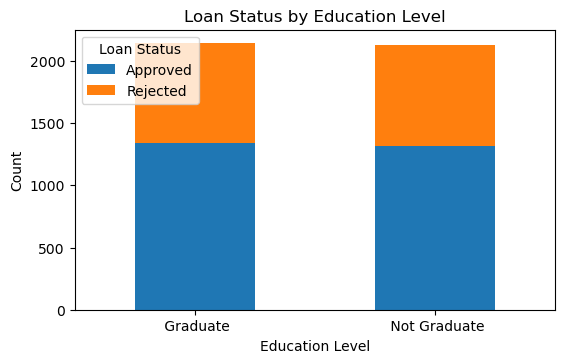

In [8]:
df.columns = df.columns.str.strip()

if 'education' in df.columns and 'loan_status' in df.columns:
    education_loan_status_counts = df.groupby(['education', 'loan_status']).size().unstack()

    plt.figure(figsize=(4, 2))
    education_loan_status_counts.plot(kind='bar', stacked=True, figsize = (6,4))
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper left', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
    plt.show()

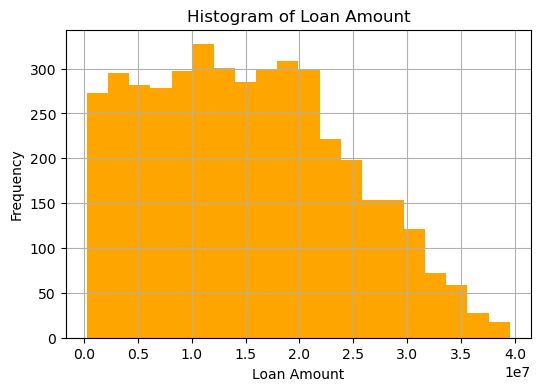

In [9]:
plt.figure(figsize=(6, 4))
plt.hist(df['loan_amount'], bins=20, color='orange')
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

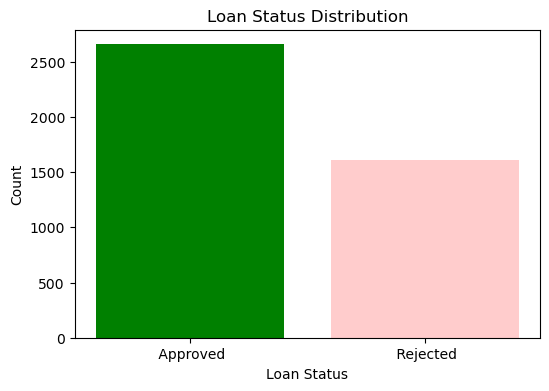

In [10]:
loan_status_counts = df['loan_status'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', (1.0, 0.8, 0.8)])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

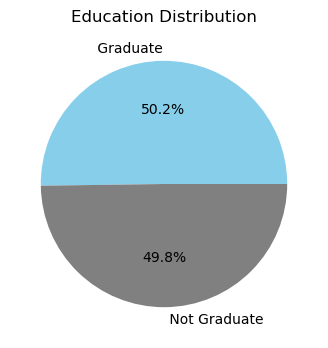

In [11]:
education_counts = df['education'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['skyblue', 'grey'])
plt.title('Education Distribution')
plt.show()

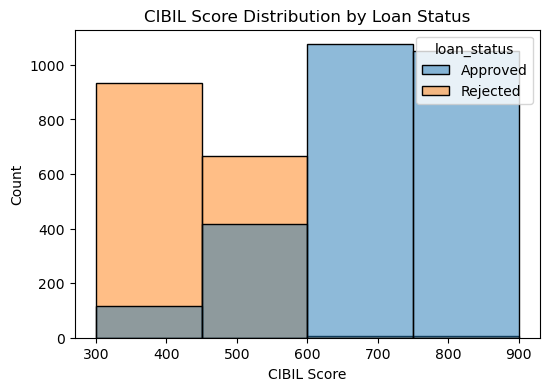

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure cibil_score is numeric and replace infinities with NaN
df['cibil_score'] = pd.to_numeric(df['cibil_score'], errors='coerce')
df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Drop rows with missing or infinite values in relevant columns
df = df.dropna(subset=['cibil_score', 'loan_status'])

# Standardize loan_status values (remove leading/trailing spaces)
df['loan_status'] = df['loan_status'].str.strip()

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='cibil_score', bins=4, hue='loan_status', kde=False)
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('CIBIL Score')
plt.ylabel('Count')
plt.show()

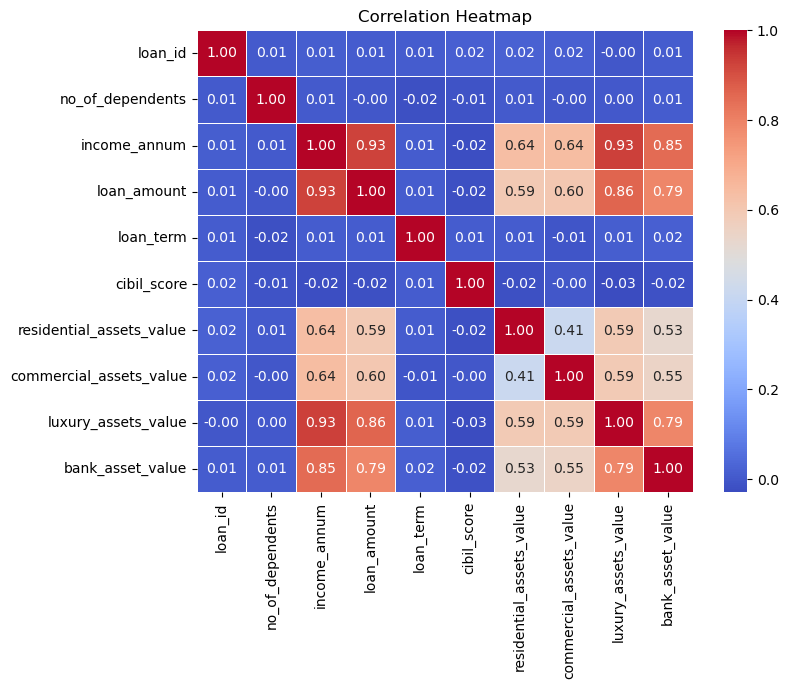

In [13]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

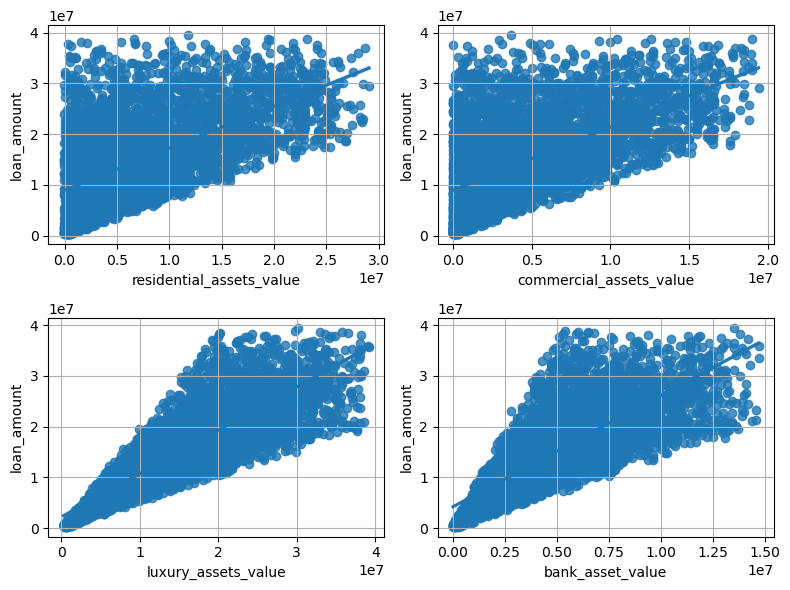

In [14]:
r=2
c=2
it=1
plt.figure(figsize=(8,6))
for i in ['residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']:
    plt.subplot(r,c,it)
    sns.regplot(x=i,y='loan_amount',data=df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

# Data Preprocessing

In [16]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [17]:
df.drop(columns=['loan_id'], inplace=True)
print(df.columns)
df.rename(columns=lambda x: x.strip(), inplace=True)
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')
Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['education'] = label_encoder.fit_transform(df['education'])
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
print(df[['education', 'self_employed','loan_status']])

      education  self_employed  loan_status
0             0              0            0
1             1              1            1
2             0              0            1
3             0              0            1
4             1              1            1
...         ...            ...          ...
4264          0              1            1
4265          1              1            0
4266          1              0            1
4267          1              0            0
4268          0              0            0

[4269 rows x 3 columns]


In [19]:
df.head(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [20]:
df.dtypes

no_of_dependents            int64
education                   int32
self_employed               int32
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int32
dtype: object

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = df.drop(columns=['loan_status'])  
y = df['loan_status']  # Target variable

numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                      'bank_asset_value']

x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

scaling_parameters = {
    'mean': scaler.mean_,
    'std': scaler.scale_
}

with open('scaling_parameters.pkl', 'wb') as file:
    pickle.dump(scaling_parameters, file)

print("Scaled Feature Variables (x):")
print(x.head())

print("\nTarget Variable (y):")
print(y.head())

Scaled Feature Variables (x):
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -0.294102          0              0      1.617979     1.633052   
1         -1.473548          1              1     -0.341750    -0.324414   
2          0.295621          0              0      1.439822     1.610933   
3          0.295621          0              0      1.119139     1.721525   
4          1.475067          1              1      1.689242     1.002681   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.192617     1.032792                 -0.780058                 2.877289   
1  -0.508091    -1.061051                 -0.733924                -0.631921   
2   1.594031    -0.544840                 -0.057300                -0.107818   
3  -0.508091    -0.771045                  1.649637                -0.381263   
4   1.594031    -1.264055                  0.757724                 0.735304   

   luxury_assets_value  bank_ass

# Data Modeling & Evaluation

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=555)

## Logistic Regression

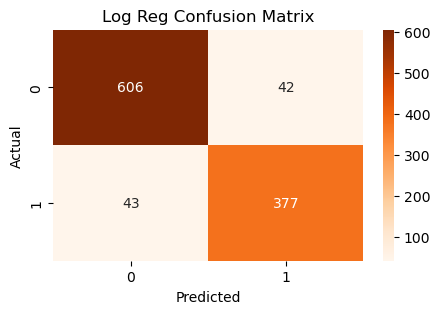

Logistic Regression Metrics:
Accuracy: 0.9204119850187266
Precision: 0.9203801658376739
Recall: 0.9204119850187266
F1 Score: 0.9203952363142984
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       648
           1       0.90      0.90      0.90       420

    accuracy                           0.92      1068
   macro avg       0.92      0.92      0.92      1068
weighted avg       0.92      0.92      0.92      1068



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

logistic_reg = LogisticRegression(random_state=42)

logistic_reg.fit(x_train, y_train)
y_pred = logistic_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

classification_rep = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Log Reg Confusion Matrix')
plt.show()

log_reg_accuracy = accuracy

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("Classification Report:\n", classification_rep)


## DecisionTree Classifier

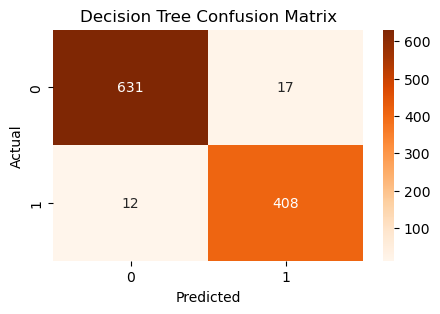

Decision Tree Classifier Metrics:
Accuracy: 0.9728464419475655
Precision: 0.9729463365194749
Recall: 0.9728464419475655
F1 Score: 0.9728741955051751
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       648
           1       0.96      0.97      0.97       420

    accuracy                           0.97      1068
   macro avg       0.97      0.97      0.97      1068
weighted avg       0.97      0.97      0.97      1068



In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

dec_tree_accuracy = accuracy

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

## RandomForest Classifier

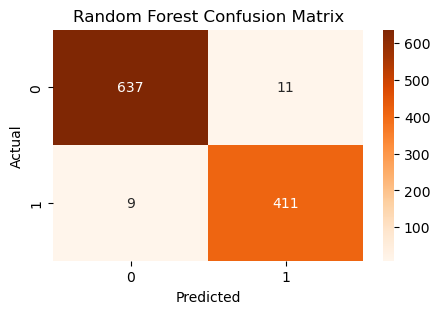

Random Forest Classifier Metrics:
Accuracy: 0.9812734082397003
Precision: 0.9812961319516216
Recall: 0.9812734082397003
F1 Score: 0.9812811769836893
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       648
           1       0.97      0.98      0.98       420

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

rf_accuracy = accuracy 

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

## KNN Classifier

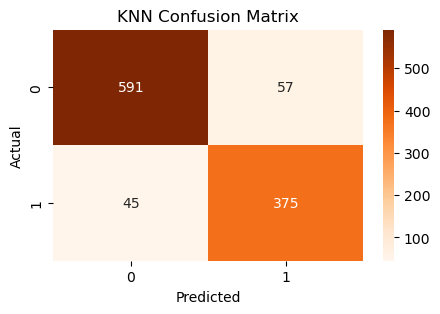

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.9044943820224719
Precision: 0.9051819070501496
Recall: 0.9044943820224719
F1 Score: 0.9047206688624871
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       648
           1       0.87      0.89      0.88       420

    accuracy                           0.90      1068
   macro avg       0.90      0.90      0.90      1068
weighted avg       0.91      0.90      0.90      1068



In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

knn_accuracy = accuracy

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

## XGBoost Classifier

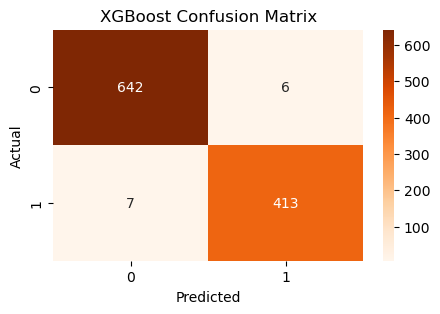

XGBoost Classifier Metrics:
Accuracy: 0.9878277153558053
Precision: 0.9878244063813445
Recall: 0.9878277153558053
F1 Score: 0.9878251537892455
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       648
           1       0.99      0.98      0.98       420

    accuracy                           0.99      1068
   macro avg       0.99      0.99      0.99      1068
weighted avg       0.99      0.99      0.99      1068



In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
with open('xgb_classifier.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

xgb_accuracy = accuracy

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

## Hybrid - Voting Classifier

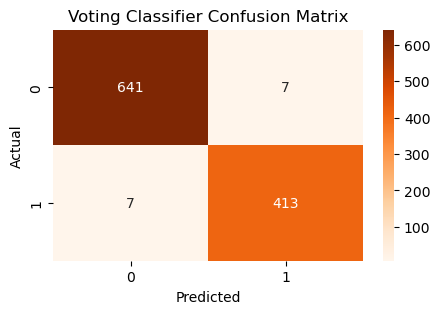

Ensemble Classifier Metrics:
Accuracy: 0.9868913857677902
Precision: 0.9868913857677902
Recall: 0.9868913857677902
F1 Score: 0.9868913857677902
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       648
           1       0.98      0.98      0.98       420

    accuracy                           0.99      1068
   macro avg       0.99      0.99      0.99      1068
weighted avg       0.99      0.99      0.99      1068



In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Voting Classifier Confusion Matrix')
plt.show()

voting_accuracy = accuracy 
# Print evaluation metrics separately
print("Ensemble Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

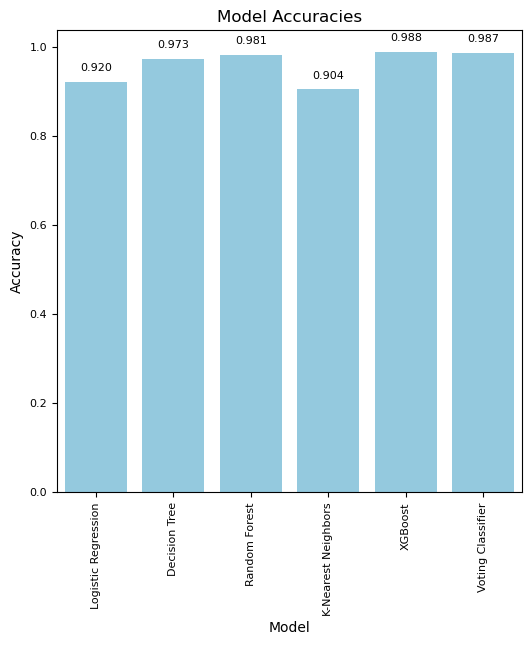

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with model names and their corresponding accuracy values
import pandas as pd

data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'XGBoost', 'Voting Classifier'],
    'Accuracy': [log_reg_accuracy, dec_tree_accuracy, rf_accuracy, knn_accuracy, xgb_accuracy, voting_accuracy]
}

df = pd.DataFrame(data)

# Creating a vertical bar plot with small font size for values displayed on top using seaborn
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=df, color='skyblue')

# Displaying values on top of each bar with small font size
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

    
# Adjusting font size of X-axis labels
plt.xticks(rotation='vertical', fontsize=8)

# Adjusting font size of Y-axis labels
plt.yticks(fontsize=8)

plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()


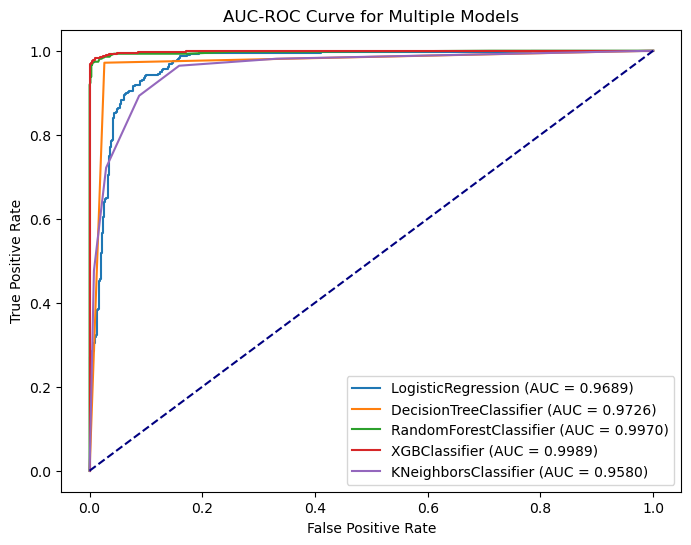

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

models = [logistic_reg, decision_tree, random_forest, xgb_classifier, knn_classifier]

# Plot AUC-ROC curves for each model
plt.figure(figsize=(8, 6))

for model in models:
    # Train the model
    model.fit(x_train, y_train)
    
    # Get probability scores for the positive class on the test set
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(x_test)[:, 1]  # Probability of positive class
    else:
        y_score = model.decision_function(x_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=[0, 1]), y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.4f})')

# Plot the random line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Multiple Models')
plt.legend(loc='lower right')
plt.show()


In [38]:
from flask import Flask, request, render_template, jsonify
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Initialize the Flask app
app = Flask(__name__)

# Load the trained XGBoost classifier
with open('xgb_classifier.pkl', 'rb') as file:
    xgb_classifier = pickle.load(file)

# Route for the home page
@app.route('/')
def home():
    return render_template('index.html')  # Ensure 'index.html' exists in the 'templates' folder

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get form data
        data = request.form.to_dict()
        print("Raw data received:", data)

        # Define the mapping between raw input column names and model's expected column names
        column_mapping = {
            ' no_of_dependents': 'no_of_dependents',
            ' education': 'education',
            ' self_employed': 'self_employed',
            ' income_annum': 'income_annum',
            ' loan_amount': 'loan_amount',
            ' loan_term': 'loan_term',
            ' cibil_score': 'cibil_score',
            ' residential_assets_value': 'residential_assets_value',
            ' commercial_assets_value': 'commercial_assets_value',
            ' luxury_assets_value': 'luxury_assets_value',
            ' bank_asset_value': 'bank_asset_value',
        }

        # Initialize a dictionary for the cleaned input data
        cleaned_data = {}

        # Map raw input keys to the expected column names
        for raw_col, clean_col in column_mapping.items():
            cleaned_data[clean_col] = data.get(raw_col, 0)  # Default to 0 if the field is missing

        # Map categorical variables
        education_mapping = {'Not Graduate': 1, 'Graduate': 0}
        cleaned_data['education'] = education_mapping.get(cleaned_data['education'], cleaned_data['education'])

        self_employed_mapping = {'No': 0, 'Yes': 1}
        cleaned_data['self_employed'] = self_employed_mapping.get(cleaned_data['self_employed'], cleaned_data['self_employed'])

        # Convert cleaned data to a DataFrame
        data_df = pd.DataFrame([cleaned_data])
        print("Data after cleaning and mapping:", data_df)

        # Load scaling parameters
        with open(r'C:\Users\yeswa\Downloads\scaling_parameters.pkl', 'rb') as file:
            loaded_scaling_parameters = pickle.load(file)

        # Apply scaling
        scaler = StandardScaler()
        scaler.mean_ = loaded_scaling_parameters['mean']
        scaler.scale_ = loaded_scaling_parameters['std']
        numerical_columns = [
            'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
            'cibil_score', 'residential_assets_value', 'commercial_assets_value',
            'luxury_assets_value', 'bank_asset_value'
        ]
        data_df[numerical_columns] = scaler.transform(data_df[numerical_columns])

        # Predict using the loaded model
        prediction = xgb_classifier.predict(data_df)
        print("Prediction:", prediction)

        # Interpret the result
        result = 'Approved' if prediction[0] == 0 else 'Rejected'
        return render_template('result.html', prediction_result=result)

    except Exception as e:
        print(f"An error occurred: {e}")
        return jsonify({'error': f'An error occurred: {e}'})

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [09/Dec/2024 01:40:08] "GET / HTTP/1.1" 200 -
C:\Users\yeswa\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
127.0.0.1 - - [09/Dec/2024 01:40:10] "POST /predict HTTP/1.1" 200 -


Raw data received: {'education': 'Graduate', 'self_employed': 'Yes'}
Data after cleaning and mapping:    no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 0          0              0             0            0   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0          0            0                         0                        0   

   luxury_assets_value  bank_asset_value  
0                    0                 0  
Prediction: [0]


In [39]:
# no_of_dependents                   5
# education                          1
# self_employed                      1
# income_annum                 3400000
# loan_amount                  9400000
# loan_term                         16
# cibil_score                      535
# residential_assets_value     3100000
# commercial_assets_value      5600000
# luxury_assets_value         12900000
# bank_asset_value             3200000
# loan_status                        1


# no_of_dependents                   4
# education                          0
# self_employed                      1
# income_annum                 5900000
# loan_amount                 17300000
# loan_term                         20
# cibil_score                      657
# residential_assets_value     1500000
# commercial_assets_value      5600000
# luxury_assets_value         13000000
# bank_asset_value             4100000
# loan_status                        0